<a href="https://colab.research.google.com/github/kolstep/IntroToDataScience/blob/master/whatsapp_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the libraries

In [ ]:
import regex
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Prepare the dataset

In [ ]:
def date_time(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result = regex.match(pattern, s)
    if result:
        return True
    return False

def find_author(s):
    s = s.split(":")
    if len(s)==2:
        return True
    else:
        return False

def getDatapoint(line):
    splitline = line.split(' - ')
    dateTime = splitline[0]
    date, time = dateTime.split(", ")
    message = " ".join(splitline[1:])
    if find_author(message):
        splitmessage = message.split(": ")
        author = splitmessage[0]
        message = " ".join(splitmessage[1:])
    else:
        author= None
    return date, time, author, message

# Import the dataset

In [ ]:
data = []
conversation = 'WhatsApp Chat with Donvic Lancs.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer = []
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if date_time(line):
            if len(messageBuffer) > 0:
                data.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDatapoint(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

# view the last 20 messages from the dataset

In [ ]:
df = pd.DataFrame(data, columns=["Date", 'Time', 'Author', 'Message'])
df['Date'] = pd.to_datetime(df['Date'])
print(df.tail(20))
print(df.info())
print(df.Author.unique())

           Date  ...                                            Message
2458 2022-05-02  ...                                    <Media omitted>
2459 2022-05-02  ...                                    <Media omitted>
2460 2022-05-02  ...                                    <Media omitted>
2461 2022-06-02  ...                                               Boss
2462 2022-06-02  ...                                  Missed voice call
2463 2022-07-02  ...                                             bosses
2464 2022-07-02  ...                 Please send me akant for grammerly
2465 2022-07-02  ...                             I didn't write it down
2466 2022-07-02  ...                                         no account
2467 2022-07-02  ...                                           na crack
2468 2022-07-02  ...                                           Emma own
2469 2022-07-02  ...                                           quillbot
2470 2022-07-02  ...                                            

# view the total messages between this whatsapp chat

In [ ]:
total_messages = df.shape[0]
print(total_messages)

2478




# total number of media in the message



In [ ]:
media_messages = df[df["Message"]=='<Media omitted>'].shape[0]
print(media_messages)

391


# extract the URL in the chat

In [ ]:
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: regex.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)

print("Chats between kolstep and Donvic Lancs")
print("Total Messages: ", total_messages)
print("Number of Media Shared: ", media_messages)
print("Number of Links Shared", links)

Chats between kolstep and Donvic Lancs
Total Messages:  2478
Number of Media Shared:  391
Number of Links Shared 126


# get more insight from the dataset

In [ ]:
media_messages_df = df[df['Message'] == '<Media omitted>']
messages_df = df.drop(media_messages_df.index)
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

l = ["kolstep", "Donvic Lancs"]
for i in range(len(l)):
  # Filtering out messages of particular user
  req_df= messages_df[messages_df["Author"] == l[i]]
  # req_df will contain messages of only one particular user
  print(f'Stats of {l[i]} -')
  # shape will print number of rows which indirectly means the number of messages
  print('Messages Sent', req_df.shape[0])
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Average Words per message', words_per_message)
  #media conists of media messages
  media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
  print('Media Messages Sent', media)
  #links consist of total links
  links = sum(req_df["urlcount"])   
  print('Links Sent', links)

Stats of kolstep -
Messages Sent 678
Average Words per message 10.218289085545722
Media Messages Sent 94
Links Sent 13
Stats of Donvic Lancs -
Messages Sent 1291
Average Words per message 7.0720371804802475
Media Messages Sent 297
Links Sent 3


# visualise the dataset to know the most used word

There are 102849 words in all the messages.


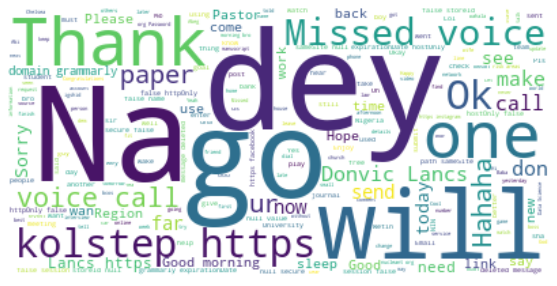

In [ ]:
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# most used words by each person

Author name kolstep


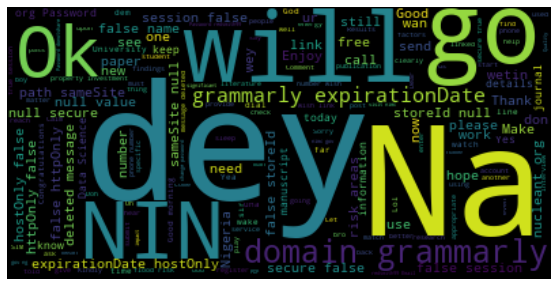

Author name Donvic Lancs


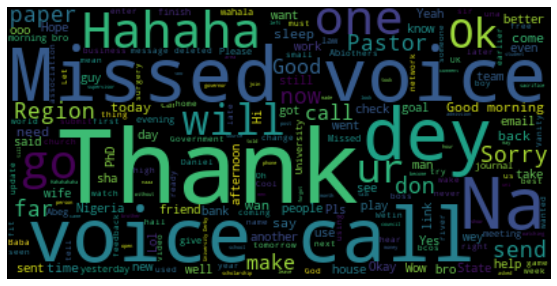

In [ ]:
l = ["kolstep", "Donvic Lancs"]
for i in range(len(l)):
  dummy_df = messages_df[messages_df['Author'] == l[i]]
  text = " ".join(review for review in dummy_df.Message)
  stopwords = set(STOPWORDS)
  #Generate a word cloud image
  print('Author name',l[i])
  wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)
  #Display the generated image   
  plt.figure( figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()